In [ ]:
### Jupyter notebook with final plots for the method paper

In [1]:
#import math
import os
import numpy as np
import scipy.io
import math
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator # For forcing tick labels to be integers
from scipy import spatial
import pandas as pd

# Configure some Matplotlib settings.
fontSize=20
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4), "svg.fonttype" : "none", 'pdf.fonttype':42,'font.family':'sans-serif','font.sans-serif':'Helvetica','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize})   #,'text.usetex':True,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
plotStyles={"markersize":8,"markeredgewidth":1.0,"linewidth":3.0}
stepStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}
barStyles={"width":0.65, "linewidth":0, "align":"center"}
np.seterr(divide='ignore',invalid='ignore')
pass

In [2]:
### FIGURE 1

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


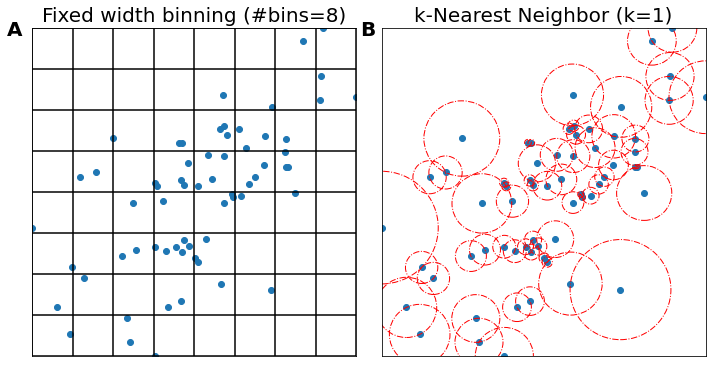

In [3]:
# Preparing data for plot
np.random.seed(13)  ### CHANGE ME IF NEEDED
correlation = 0.6
Ntot = 64 #49 #16
#bins = int(np.ceil(Ntot**(1/2))+1)
bins = int(np.floor(Ntot**(1/2)))
covs = [[1, correlation], [correlation, 1]]
m = np.random.multivariate_normal([0,0], covs, Ntot).T
H, xedges, yedges = np.histogram2d(m[0], m[1], bins=bins)
H_ap, xedges_ap, yedges_ap = np.histogram2d(m[0], m[1], bins=Ntot)
        
    
# Plotting
matplotlib.rcParams.update({"figure.figsize": (10,5.5)})
fig, ax = plt.subplots(1,2,sharey=True)#,sharex=True)

# Fixed width binning
ax[0].set_title('Fixed width binning (#bins=%d)'%bins)
ax[0].scatter(m[0],m[1])
for line in xedges:
    ax[0].axvline(x=line, color='k')
for line in yedges:
    ax[0].axhline(y=line, color='k')

#ax[0].imshow(H, interpolation='nearest', origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

# k-Nearest Neighbor
k_max = 10
pts = np.c_[m[0].ravel(), m[1].ravel()]
tree = spatial.KDTree(pts)
tree_x = spatial.KDTree(np.c_[m[0]])
tree_y = spatial.KDTree(np.c_[m[1]])
distance_array, pts_locations = tree.query(pts, k_max+1, p=2) #p=2 # Euclidean distance, #p=np.inf #Chebchenko

k_plot=1
ax[1].set_title('k-Nearest Neighbor (k=%d)'%k_plot)
#ax[2].scatter(m[0],m[1])
#ax[2].scatter(m[0],m[1], marker = "o", s = 1000, alpha = 0.3)
ax[1].scatter(m[0],m[1])
for point in range(pts_locations.shape[0]):
    #cir = plt.Circle(pts[pts_locations[0][0]], distance_array[0][k_plot], color='r',fill=False)
    cir = plt.Circle(pts[pts_locations[point][0]], distance_array[point][k_plot], color='r', ls='-.',fill=False)
    ax[1].add_patch(cir)
#cir = plt.Circle((1.5, 1.5), 0.7, color='r',fill=False)
#ax[2].set_aspect('equal', adjustable='datalim')
#ax[2].add_patch(cir)

# Formatting the subplots
for axii in ax:
    axii.set_yticks([]); axii.set_xticks([])
    axii.set_yticklabels([]); axii.set_xticklabels([])
    axii.set_ylim(min(m[1]),max(m[1]))
    axii.set_xlim(min(m[0]),max(m[0]))

plt.tight_layout()

plt.figtext(0.0,0.91,"A", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
plt.figtext(0.49,0.91,"B", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})

plt.savefig('Figure1_illustration_FB_and_kNN.pdf', dpi = 300, bbox_inches='tight')